# Using Machine Learning Tools 2023, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore over-fitting and know what appropriate actions to take in these cases.
 

It is the intention that this assignment will take you through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (including all models and hyperparameter settings that you consider).  

In addition, you are told to **create a validation set and any necessary test sets using _only_ the supplied testing dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased accuracy** estimate of a deep learning model (since DL models are fast when deployed)
 - the letter with the lowest individual accuracy
 - the most common error (of one letter being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data, checking it, fixing any problems, and displaying a sample
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best one, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly what networks you have tried, the method you used to optimise them, the associated learning curves, their summary performance and selection process to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - a statistical test between the best and second-best models, to see if there is any significant difference in performance (overall accuracy)
 - it is hoped that the accuracy will exceed 96% overall and better than 90% for every individual letter, and you are asked to:
     - report the overall accuracy
     - report the accuracy for each individual letter
     - write a short recommendation regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps, as you've used in other assignments and workshops.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing, beyond the code, comments and the small amount that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (short summaries often help here), and include a few small markdown cells that describe or summarise things when necessary.

Marks for the assignment will be determined according to the general rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 10%: Loading, investigating, manipulating and displaying data
 - 20%: Initial model successfully trained (and acting as a baseline)
 - 45%: Optimisation of an appropriate set of models in an appropriate way (given the constraint of 50 training runs) # epoch
 - 25%: Comparison of models, selection of the best two and reporting of final results

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments. The one exception to this is the statistical test, which will be covered in week 11.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis. 
- Your code must use the current stable versions of python libraries, not outdated versions.
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code, so that its purpose is clear to the reader!
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently. Make sure you have clean, readable code as well as producing outputs, since your coding will also count towards the marks (however, excessive commenting is discouraged and will lose marks, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib and keras, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from the workshops as a base for this assignment but be aware that they will normally not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications.

The assignment is worth 35% of your overall mark for the course.

Mark Jenkinson  
May 2022

# 1. Loading, investigating, manipulating and displaying data

### 1.1 Importing the library

In [1]:
# Common imports
import numpy as np
import os, time
import pandas as pd
import sys
import sklearn

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

In [2]:
# Check the versions both should be 2 or more
print(tf.__version__)
print(keras.__version__)

2.11.0
2.11.0


###  1.2 **Load data**
<img src="amer_sign2.png" alt="American Sign Language" width="500">
We will use Sign Language MNIST. The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and no cases for 9=J or 25=Z because of gesture motions). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST handwritten digit dataset but otherwise similar with a header row of label, pixel1,pixel2,...pixel784 which represent a single 28x28 pixel image with grayscale values between 0-255.

In [3]:
# read the dataset by pandas
train_df = pd.read_csv('C:\\Users\\PUTRI KHALILAH\\Desktop\\Trimester 2 2023\\COMP SCI 7317\\WEEK 10\\Assignment_3\\sign_mnist_train.csv')
test_df = pd.read_csv('C:\\Users\\PUTRI KHALILAH\\Desktop\\Trimester 2 2023\\COMP SCI 7317\\WEEK 10\\Assignment_3\\sign_mnist_test.csv')

###  1.3 **Investigating data** 

In [4]:
# Check the size of the dataset
print(train_df.shape)
print(test_df.shape)
n_total = train_df.shape[0]
print()
print("Number of rows in training dataset:",n_total)

(27455, 785)
(7172, 785)

Number of rows in training dataset: 27455


In [5]:
# checking the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
# It has 785 columns with the first column is a target variable named "label"
# 784 columns represents a single 28x28 pixel image with grayscale values between 0-255.
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [8]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


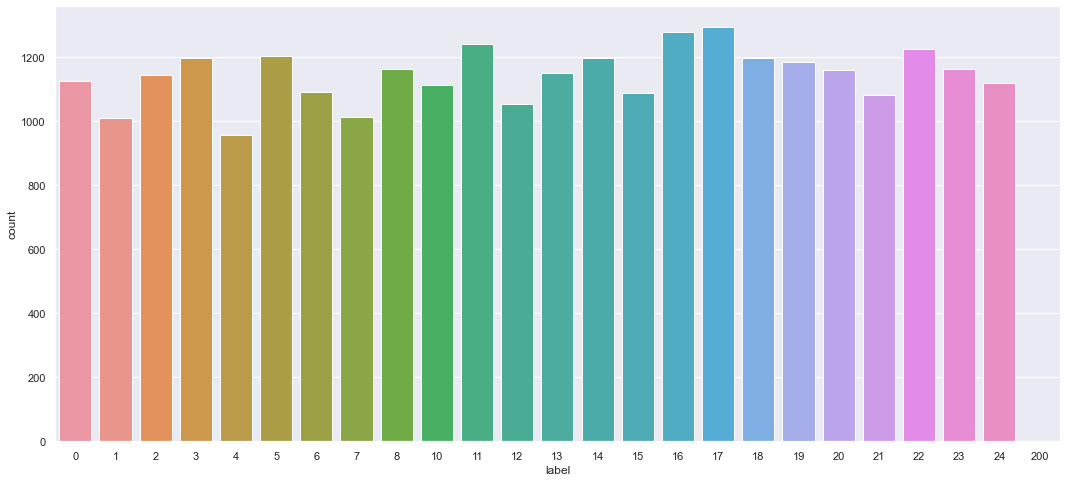

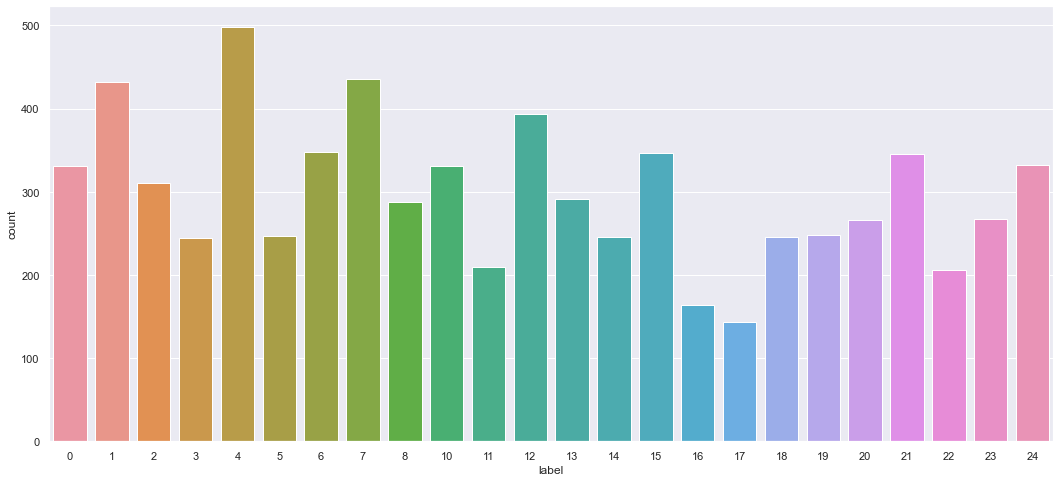

In [9]:
# Let's look at the distribution of labels in the training and test sets
# they should be 24 labels in the dataset
# However in the training set has 1 outlier, we can remove this 200 label feature
plt.figure(figsize = (18,8))
sns.countplot(x = train_df['label'])
plt.figure(figsize = (18,8))
sns.countplot(x = test_df['label']) # change the class one less ahead
plt.show()

In [10]:
# Detecting 1 row outlier in the dataset. can remove this as it would not affect the number of dataset.
train_df.loc[train_df['label'] ==200]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
498,200,121,125,129,132,134,137,139,141,144,...,76,146,198,192,194,194,195,195,195,195


In [11]:
train_df = train_df.loc[train_df['label'] < 200]
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27454 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.6 MB


###  1.4 **Manipulating data** 

In [12]:
# Since there is no J and Z in the label, it is good practice to remapping the label index accordingly.
label_counts = train_df['label'].value_counts()
print(label_counts)

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
3     1196
14    1196
19    1186
23    1164
8     1162
20    1160
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64


In [13]:
# Create a label mapping to change the label according to index.
label_mapping = {
    10: 9,
    11: 10,
    12: 11,
    13: 12,
    14: 13,
    15: 14,
    16: 15,
    17: 16,
    18: 17,
    19: 18,
    20: 19,
    21: 20,
    22: 21,
    23: 22,
    24: 23
}

# Apply the label mapping to the 'label' column in the DataFrame
train_df['label'] = train_df['label'].apply(lambda x: label_mapping.get(x, x))

# Recalculate the counts of unique labels after the adjustment
label_counts = train_df['label'].value_counts()

# Print the count of unique labels after adjustment
print("Count of Unique Labels After Manual Adjustment:")
print(label_counts)

Count of Unique Labels After Manual Adjustment:
16    1294
15    1279
10    1241
21    1225
5     1204
17    1199
3     1196
13    1196
18    1186
22    1164
8     1162
19    1160
12    1151
2     1144
0     1126
23    1118
9     1114
6     1090
14    1088
20    1082
11    1055
7     1013
1     1010
4      957
Name: label, dtype: int64


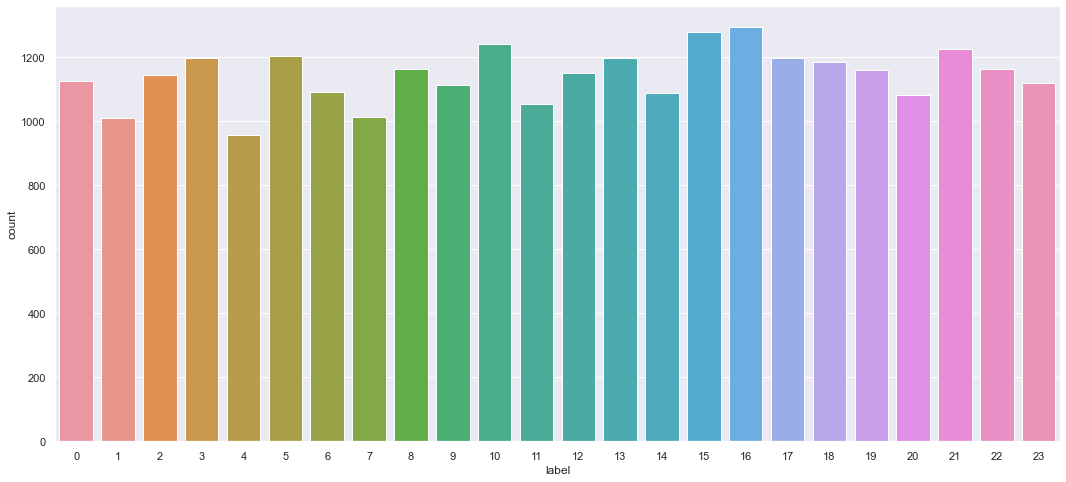

In [14]:
# Double checking the label followed the index.
plt.figure(figsize = (18,8))
sns.countplot(x = train_df['label'])

# do for test set as well.
# Apply the label mapping to the 'label' column in the DataFrame
test_df['label'] = test_df['label'].apply(lambda x: label_mapping.get(x, x))

In [15]:
# separating the dataframe into train set and test set by separating the label from the rest of the features.
train_set = train_df.drop(['label'],axis = 1)
train_label = train_df['label']
test_set = test_df.drop(['label'],axis = 1)
test_label = test_df['label']
train_set.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [16]:
train_label.head()

0     3
1     6
2     2
3     2
4    12
Name: label, dtype: int64

###  1.5 **Displaying data** 

In [17]:
# Conver to numpy arrays
train_set = train_set.values
train_label = train_label.values
test_set = test_set.values
test_label = test_label.values

I


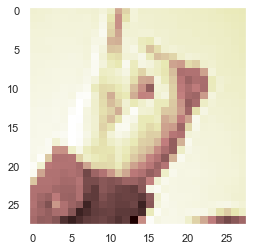

R


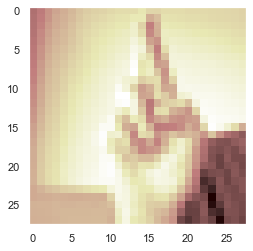

B


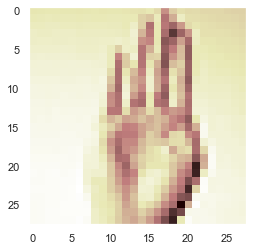

A


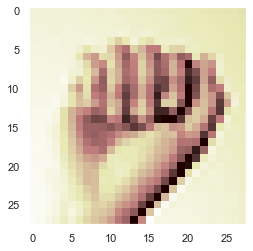

Q


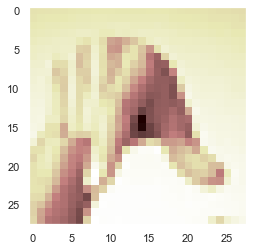

U


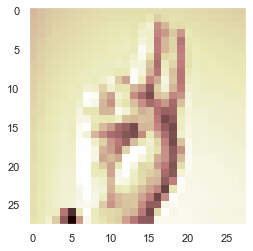

Y


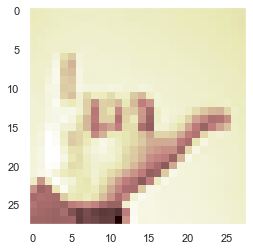

H


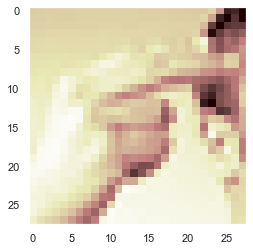

E


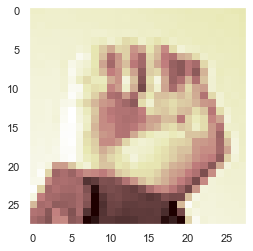

C


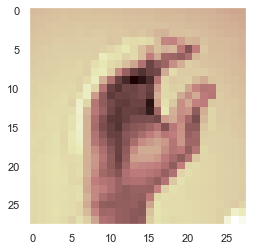

K


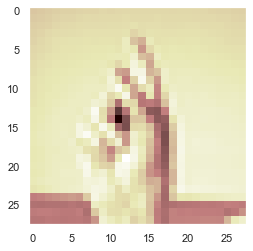

G


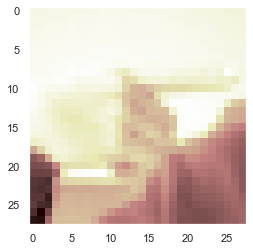

D


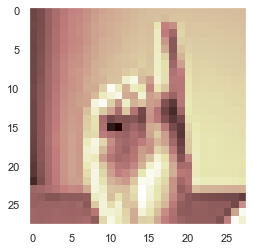

C


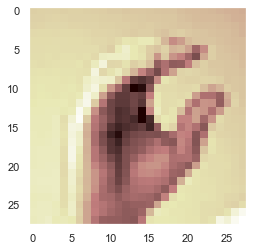

M


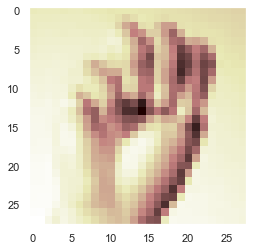

B


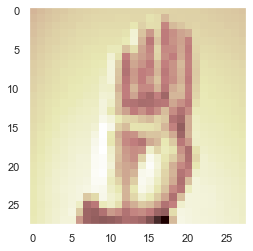

M


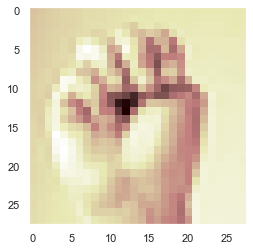

K


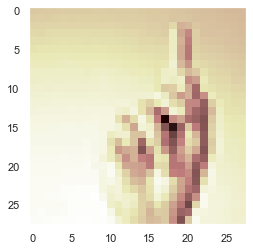

Q


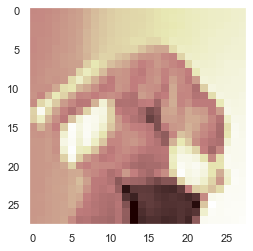

G


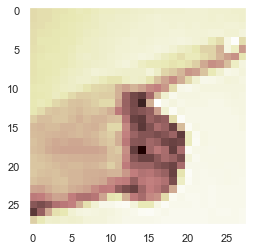

In [18]:
# Split data in validation (7455) and train (20000).
# A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. 
# This involves first converting the data type from unsigned integers to floats, 
# then dividing the pixel values by the maximum value.
# Scale the data appropriately (it starts with max of 255, but we want max of 1)

X_test = test_set/255
X_val, X_train = train_set[:7455]/255, train_set[7455:]/255

# The same, but for y.


y_test = test_label
y_val, y_train = train_label[:7455], train_label[7455:]

X_train = X_train.reshape(-1,28,28,1) # reshape to 2D Convolution
X_test = X_test.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)

# x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
# x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

class_names = np.array([ "A","B","C","D","E","F","G","H","I","K",
                         "L","M","N","O","P","Q","R","S","T","U",
                          "V","W","X","Y"])

# print(class_names[y_train[6]])
# plt.imshow(X_train[6,:,:], cmap='gray')
# plt.grid(False)
# plt.show()

list_1 = range(0,20)
for i in list_1:
    print(class_names[y_train[i]])
    plt.imshow(X_train[i,:,:].reshape(28,28), cmap='pink')
    plt.grid(False)
    plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical

# We also know that there are 24 classes and that classes are represented as unique integers.
# We can, therefore, use a one hot encoding for the class element of each sample, 
# transforming the integer into a 24 element binary vector with a 1 for the index of the class value, 
# and 0 values for all other classes. We can achieve this with the to_categorical() utility function.

# one hot encode target values
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# 2. Initial model successfully trained (and acting as a baseline)

The model has two main aspects: the feature extraction front end comprised of convolutional and pooling layers, and the classifier backend that will make a prediction.

For the convolutional front-end, we can start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification task, we know that we will require an output layer with 24 nodes in order to predict the probability distribution of an image belonging to each of the 24 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

All layers will use the ReLU activation function and the He weight initialization scheme, both best practices.

We will use a conservative configuration for the stochastic gradient descent optimizer with a learning rate of 0.01 and a momentum of 0.9. The categorical cross-entropy loss function will be optimized, suitable for multi-class classification, and we will monitor the classification accuracy metric, which is appropriate given we have the same number of examples in each of the 24 classes.

###  2.1 **Create and define the model** 

In [20]:
from tensorflow.keras.optimizers import SGD

# Create a model
model = keras.models.Sequential() 
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten(input_shape = [28 , 28]))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))
model.compile(loss ="categorical_crossentropy", optimizer = SGD(learning_rate=0.01,momentum=0.9),metrics=['accuracy'])

In [21]:
# We can check a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
Total params: 543,644
Trainable params: 543,644
Non-trainable params: 0
__________________________________________________

###  2.2 **Fitting the model** 

In [22]:
# Now train (fit) the model, specifying appropriate data and number of epochs (small here to save time)
# Save the history of metrics versus epochs - *always* keep this
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/5
625/625 [==============================] - 7s 10ms/step - loss: 1.8532 - accuracy: 0.4371 - val_loss: 0.7783 - val_accuracy: 0.7564
Epoch 2/5
625/625 [==============================] - 6s 10ms/step - loss: 0.4105 - accuracy: 0.8732 - val_loss: 0.1583 - val_accuracy: 0.9610
Epoch 3/5
625/625 [==============================] - 9s 14ms/step - loss: 0.0745 - accuracy: 0.9861 - val_loss: 0.0363 - val_accuracy: 0.9966
Epoch 4/5
625/625 [==============================] - 7s 10ms/step - loss: 0.0190 - accuracy: 0.9987 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 7s 12ms/step - loss: 0.0093 - accuracy: 0.9994 - val_loss: 0.0059 - val_accuracy: 1.0000


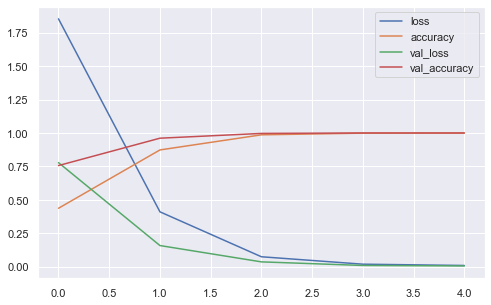

In [24]:
# Simple way to plot the history information (see later for more detail)
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.show()

###  2.3 **Evaluating the baseline model** 

In [25]:
# Now run the model on the test set and get results (loss and accuracy both reported)
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Baseline model accuracy: {test_accuracy}")

Test loss: 0.8567190766334534, Baseline model accuracy: 0.8152537941932678


In [33]:
print(f"Baseline model has the accuracy of: {round(test_accuracy,4)*100}%")

Baseline model has the accuracy of: 81.53%


**This can be explored in improving the model performance by leveraging the optimizers, learning rates, depth of the models and Batch Normalization.**

# 3. Optimisation of an appropriate set of models in an appropriate way

###  3.1 **Leveraging with learning rates and optimizers with Dense Neural Network (DNN)**

In the **DNN model**, the model have been leveraging with:
1. Different learning rates and optimizers. 

2. Dense Neural Network model architecture is utilizing with multiple hidden layers. The number of neurons in hidden layers can have a significant impact on the neural network's performance, in this case is tried with **[1024,512]**. There is no right size to choose the hidden layers but often done through experimentation and by considering the complexity of the problem you are trying to solve. Too few neurons might lead to underfitting (the network doesn't capture the complexity of the data), while too many neurons might lead to overfitting (the network memorizes the training data and performs poorly on new, unseen data).

3. Batch Normalization has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.

Epoch 1/5
625/625 [==============================] - 8s 12ms/step - loss: 1.1524 - accuracy: 0.6987 - val_loss: 0.1998 - val_accuracy: 0.9394
Epoch 2/5
625/625 [==============================] - 8s 13ms/step - loss: 0.1683 - accuracy: 0.9457 - val_loss: 0.0560 - val_accuracy: 0.9830
Epoch 3/5
625/625 [==============================] - 7s 12ms/step - loss: 0.0736 - accuracy: 0.9772 - val_loss: 0.0266 - val_accuracy: 0.9914
Epoch 4/5
625/625 [==============================] - 7s 11ms/step - loss: 0.0445 - accuracy: 0.9866 - val_loss: 0.0098 - val_accuracy: 0.9965
Epoch 5/5
625/625 [==============================] - 7s 11ms/step - loss: 0.0407 - accuracy: 0.9886 - val_loss: 0.0060 - val_accuracy: 0.9980


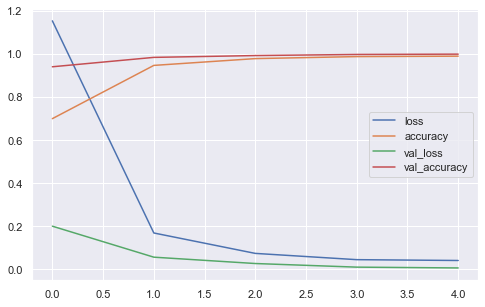

Epoch 1/5
625/625 [==============================] - 13s 20ms/step - loss: 143.8633 - accuracy: 0.3695 - val_loss: 379606.2188 - val_accuracy: 0.4778
Epoch 2/5
625/625 [==============================] - 13s 21ms/step - loss: 217.4002 - accuracy: 0.6901 - val_loss: 270.6730 - val_accuracy: 0.7738
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 147.7443 - accuracy: 0.8378 - val_loss: 312.3598 - val_accuracy: 0.8826
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 164.3399 - accuracy: 0.8927 - val_loss: 2592102.2500 - val_accuracy: 0.9135
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 220.8741 - accuracy: 0.9133 - val_loss: 497257.4062 - val_accuracy: 0.9677


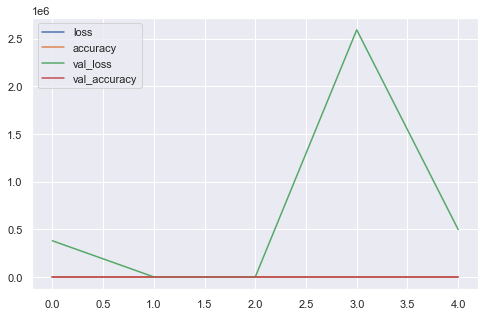

Epoch 1/5
625/625 [==============================] - 11s 17ms/step - loss: 452.9666 - accuracy: 0.3645 - val_loss: 326.4940 - val_accuracy: 0.6219
Epoch 2/5
625/625 [==============================] - 11s 18ms/step - loss: 234.1684 - accuracy: 0.7071 - val_loss: 316.0567 - val_accuracy: 0.8274
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 178.8415 - accuracy: 0.8420 - val_loss: 202775.5000 - val_accuracy: 0.8679
Epoch 4/5
625/625 [==============================] - 10s 16ms/step - loss: 155.1177 - accuracy: 0.8990 - val_loss: 162.0353 - val_accuracy: 0.9241
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 141.1040 - accuracy: 0.9263 - val_loss: 96575.9141 - val_accuracy: 0.9642


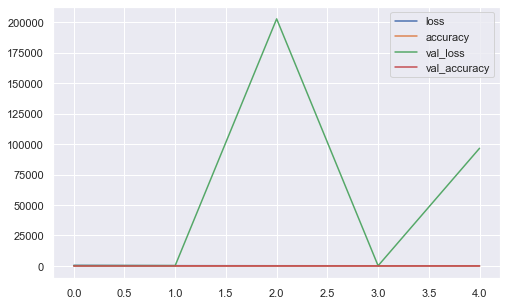

Epoch 1/5
625/625 [==============================] - 17s 25ms/step - loss: 93.8235 - accuracy: 0.3574 - val_loss: 8115.0166 - val_accuracy: 0.4555
Epoch 2/5
625/625 [==============================] - 15s 23ms/step - loss: 80.9889 - accuracy: 0.6738 - val_loss: 150.8794 - val_accuracy: 0.7253
Epoch 3/5
625/625 [==============================] - 16s 25ms/step - loss: 105.2053 - accuracy: 0.8087 - val_loss: 1477.5044 - val_accuracy: 0.8912
Epoch 4/5
625/625 [==============================] - 16s 26ms/step - loss: 87.2214 - accuracy: 0.8874 - val_loss: 604990.9375 - val_accuracy: 0.8963
Epoch 5/5
625/625 [==============================] - 15s 24ms/step - loss: 168.1201 - accuracy: 0.8990 - val_loss: 48270.9688 - val_accuracy: 0.9571


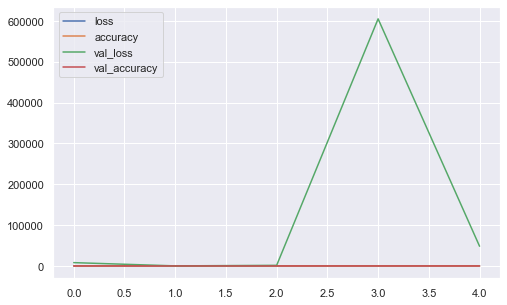

Epoch 1/5
625/625 [==============================] - 7s 11ms/step - loss: 0.4392 - accuracy: 0.8772 - val_loss: 0.0211 - val_accuracy: 0.9969
Epoch 2/5
625/625 [==============================] - 7s 11ms/step - loss: 0.0452 - accuracy: 0.9890 - val_loss: 0.0074 - val_accuracy: 0.9985
Epoch 3/5
625/625 [==============================] - 7s 11ms/step - loss: 0.0197 - accuracy: 0.9960 - val_loss: 0.0063 - val_accuracy: 0.9992
Epoch 4/5
625/625 [==============================] - 7s 12ms/step - loss: 0.0234 - accuracy: 0.9943 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 5/5
625/625 [==============================] - 8s 12ms/step - loss: 0.0074 - accuracy: 0.9985 - val_loss: 0.0124 - val_accuracy: 0.9961


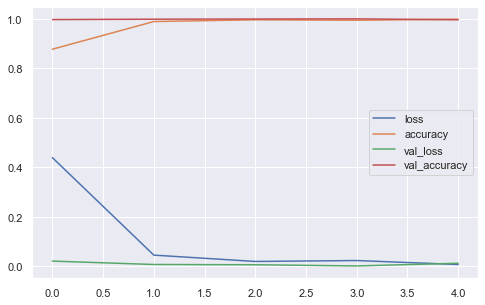

Epoch 1/5
625/625 [==============================] - 15s 23ms/step - loss: 2.5740 - accuracy: 0.4809 - val_loss: 6.8288 - val_accuracy: 0.6229
Epoch 2/5
625/625 [==============================] - 13s 21ms/step - loss: 2.9992 - accuracy: 0.7525 - val_loss: 4.4052 - val_accuracy: 0.8753
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 1.6393 - accuracy: 0.8876 - val_loss: 1.3963 - val_accuracy: 0.9353
Epoch 4/5
625/625 [==============================] - 13s 20ms/step - loss: 2.1011 - accuracy: 0.9056 - val_loss: 23.9483 - val_accuracy: 0.9307
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 4.2251 - accuracy: 0.9055 - val_loss: 2.5474 - val_accuracy: 0.9686


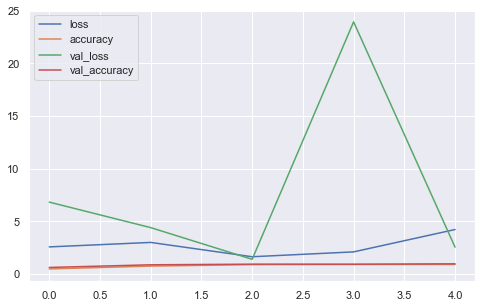

Epoch 1/5
625/625 [==============================] - 10s 15ms/step - loss: 4.3897 - accuracy: 0.4402 - val_loss: 4.1817 - val_accuracy: 0.6645
Epoch 2/5
625/625 [==============================] - 10s 16ms/step - loss: 2.3878 - accuracy: 0.7696 - val_loss: 1.3640 - val_accuracy: 0.8716
Epoch 3/5
625/625 [==============================] - 11s 18ms/step - loss: 1.9366 - accuracy: 0.8704 - val_loss: 2.9958 - val_accuracy: 0.9142
Epoch 4/5
625/625 [==============================] - 11s 18ms/step - loss: 1.6729 - accuracy: 0.9141 - val_loss: 6.8748 - val_accuracy: 0.9631
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 1.5598 - accuracy: 0.9363 - val_loss: 9.4706 - val_accuracy: 0.9509


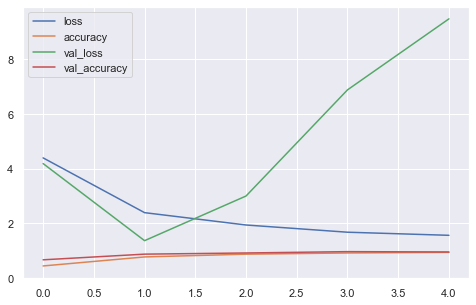

Epoch 1/5
625/625 [==============================] - 17s 24ms/step - loss: 1.8555 - accuracy: 0.5462 - val_loss: 6.2266 - val_accuracy: 0.3659
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.9870 - accuracy: 0.7849 - val_loss: 2.0540 - val_accuracy: 0.7851
Epoch 3/5
625/625 [==============================] - 15s 25ms/step - loss: 1.7898 - accuracy: 0.8341 - val_loss: 34.0489 - val_accuracy: 0.8696
Epoch 4/5
625/625 [==============================] - 15s 23ms/step - loss: 1.8095 - accuracy: 0.8702 - val_loss: 14.7558 - val_accuracy: 0.9302
Epoch 5/5
625/625 [==============================] - 18s 29ms/step - loss: 1.0736 - accuracy: 0.9319 - val_loss: 0.6964 - val_accuracy: 0.9740


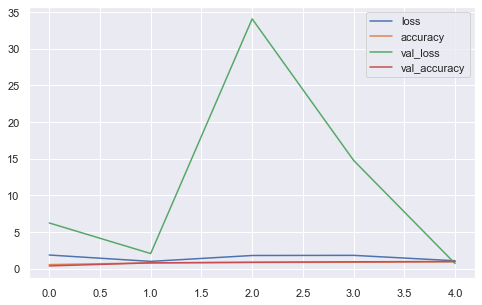

Epoch 1/5
625/625 [==============================] - 8s 12ms/step - loss: 0.6078 - accuracy: 0.8545 - val_loss: 0.0864 - val_accuracy: 0.9966
Epoch 2/5
625/625 [==============================] - 8s 12ms/step - loss: 0.0672 - accuracy: 0.9969 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 10s 16ms/step - loss: 0.0306 - accuracy: 0.9993 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 9s 14ms/step - loss: 0.0195 - accuracy: 0.9999 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 8s 13ms/step - loss: 0.0150 - accuracy: 0.9997 - val_loss: 0.0036 - val_accuracy: 1.0000


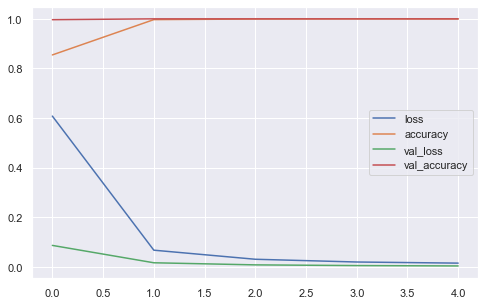

Epoch 1/5
625/625 [==============================] - 14s 22ms/step - loss: 0.8324 - accuracy: 0.7513 - val_loss: 0.2198 - val_accuracy: 0.9396
Epoch 2/5
625/625 [==============================] - 13s 21ms/step - loss: 0.1877 - accuracy: 0.9403 - val_loss: 0.0799 - val_accuracy: 0.9724
Epoch 3/5
625/625 [==============================] - 13s 21ms/step - loss: 0.1185 - accuracy: 0.9636 - val_loss: 0.0682 - val_accuracy: 0.9783
Epoch 4/5
625/625 [==============================] - 14s 22ms/step - loss: 0.2101 - accuracy: 0.9403 - val_loss: 0.0291 - val_accuracy: 0.9915
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.1637 - accuracy: 0.9550 - val_loss: 0.1336 - val_accuracy: 0.9572


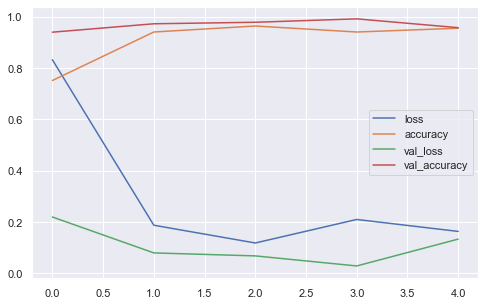

Epoch 1/5
625/625 [==============================] - 10s 16ms/step - loss: 0.9054 - accuracy: 0.7407 - val_loss: 0.1351 - val_accuracy: 0.9543
Epoch 2/5
625/625 [==============================] - 10s 15ms/step - loss: 0.1822 - accuracy: 0.9440 - val_loss: 0.0592 - val_accuracy: 0.9814
Epoch 3/5
625/625 [==============================] - 10s 15ms/step - loss: 0.1114 - accuracy: 0.9674 - val_loss: 0.0150 - val_accuracy: 0.9961
Epoch 4/5
625/625 [==============================] - 10s 15ms/step - loss: 0.0777 - accuracy: 0.9783 - val_loss: 0.0810 - val_accuracy: 0.9810
Epoch 5/5
625/625 [==============================] - 10s 15ms/step - loss: 0.0606 - accuracy: 0.9832 - val_loss: 0.0120 - val_accuracy: 0.9965


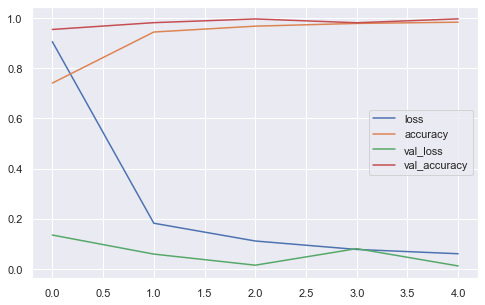

Epoch 1/5
625/625 [==============================] - 15s 22ms/step - loss: 0.7335 - accuracy: 0.7757 - val_loss: 0.2368 - val_accuracy: 0.9231
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.2093 - accuracy: 0.9321 - val_loss: 0.1780 - val_accuracy: 0.9477
Epoch 3/5
625/625 [==============================] - 14s 23ms/step - loss: 0.1359 - accuracy: 0.9557 - val_loss: 0.1608 - val_accuracy: 0.9645
Epoch 4/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0798 - accuracy: 0.9757 - val_loss: 0.1117 - val_accuracy: 0.9730
Epoch 5/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0979 - accuracy: 0.9715 - val_loss: 0.0175 - val_accuracy: 0.9942


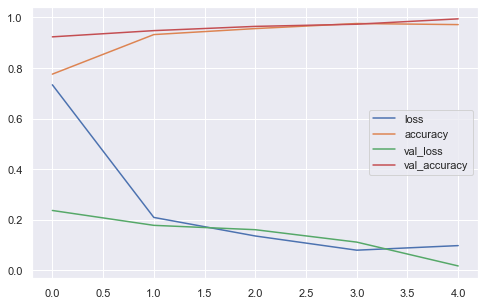

Epoch 1/5
625/625 [==============================] - 6s 10ms/step - loss: 1.9471 - accuracy: 0.4592 - val_loss: 1.0838 - val_accuracy: 0.7463
Epoch 2/5
625/625 [==============================] - 6s 10ms/step - loss: 0.8646 - accuracy: 0.7992 - val_loss: 0.5754 - val_accuracy: 0.8989
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 0.5377 - accuracy: 0.9015 - val_loss: 0.3635 - val_accuracy: 0.9539
Epoch 4/5
625/625 [==============================] - 6s 10ms/step - loss: 0.3772 - accuracy: 0.9429 - val_loss: 0.2393 - val_accuracy: 0.9783
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 0.2786 - accuracy: 0.9679 - val_loss: 0.1670 - val_accuracy: 0.9882


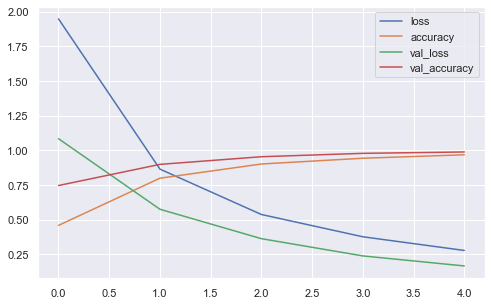

Epoch 1/5
625/625 [==============================] - 13s 20ms/step - loss: 0.5056 - accuracy: 0.8506 - val_loss: 0.0552 - val_accuracy: 0.9867
Epoch 2/5
625/625 [==============================] - 12s 19ms/step - loss: 0.1117 - accuracy: 0.9670 - val_loss: 0.0577 - val_accuracy: 0.9838
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 0.0612 - accuracy: 0.9829 - val_loss: 0.0275 - val_accuracy: 0.9933
Epoch 4/5
625/625 [==============================] - 12s 20ms/step - loss: 0.0651 - accuracy: 0.9819 - val_loss: 0.1610 - val_accuracy: 0.9552
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0300 - val_accuracy: 0.9905


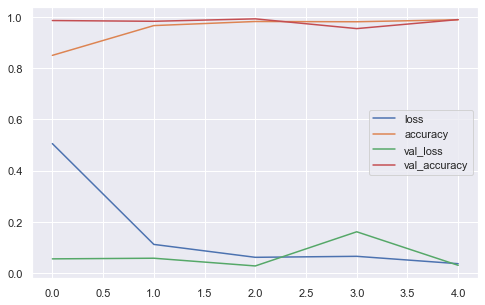

Epoch 1/5
625/625 [==============================] - 10s 16ms/step - loss: 0.5783 - accuracy: 0.8313 - val_loss: 0.0908 - val_accuracy: 0.9704
Epoch 2/5
625/625 [==============================] - 10s 16ms/step - loss: 0.1071 - accuracy: 0.9670 - val_loss: 0.0298 - val_accuracy: 0.9914
Epoch 3/5
625/625 [==============================] - 10s 16ms/step - loss: 0.0565 - accuracy: 0.9827 - val_loss: 0.0198 - val_accuracy: 0.9946
Epoch 4/5
625/625 [==============================] - 10s 16ms/step - loss: 0.0330 - accuracy: 0.9911 - val_loss: 0.0068 - val_accuracy: 0.9973
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 0.0264 - accuracy: 0.9924 - val_loss: 0.0096 - val_accuracy: 0.9975


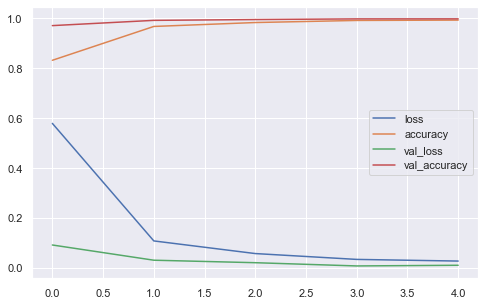

Epoch 1/5
625/625 [==============================] - 15s 22ms/step - loss: 0.4365 - accuracy: 0.8726 - val_loss: 0.0864 - val_accuracy: 0.9755
Epoch 2/5
625/625 [==============================] - 14s 23ms/step - loss: 0.0906 - accuracy: 0.9739 - val_loss: 0.0376 - val_accuracy: 0.9897
Epoch 3/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0565 - accuracy: 0.9844 - val_loss: 0.0385 - val_accuracy: 0.9885
Epoch 4/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0501 - accuracy: 0.9852 - val_loss: 0.0290 - val_accuracy: 0.9911
Epoch 5/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0504 - accuracy: 0.9854 - val_loss: 0.0042 - val_accuracy: 0.9992


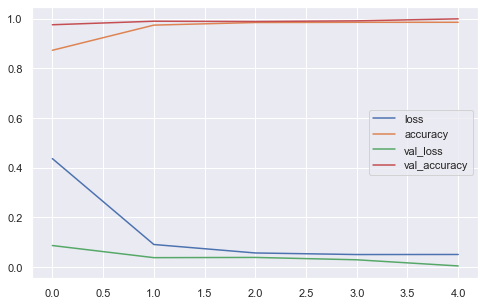

Epoch 1/5
625/625 [==============================] - 7s 10ms/step - loss: 3.4171 - accuracy: 0.0954 - val_loss: 2.9418 - val_accuracy: 0.1555
Epoch 2/5
625/625 [==============================] - 6s 10ms/step - loss: 2.6977 - accuracy: 0.2212 - val_loss: 2.4113 - val_accuracy: 0.2935
Epoch 3/5
625/625 [==============================] - 6s 10ms/step - loss: 2.2799 - accuracy: 0.3317 - val_loss: 2.0552 - val_accuracy: 0.4137
Epoch 4/5
625/625 [==============================] - 7s 11ms/step - loss: 1.9823 - accuracy: 0.4305 - val_loss: 1.7966 - val_accuracy: 0.5023
Epoch 5/5
625/625 [==============================] - 6s 10ms/step - loss: 1.7631 - accuracy: 0.5010 - val_loss: 1.5982 - val_accuracy: 0.5686


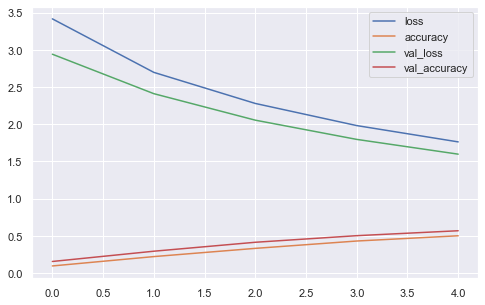

Epoch 1/5
625/625 [==============================] - 15s 23ms/step - loss: 0.6420 - accuracy: 0.8442 - val_loss: 0.0676 - val_accuracy: 0.9987
Epoch 2/5
625/625 [==============================] - 17s 26ms/step - loss: 0.0536 - accuracy: 0.9968 - val_loss: 0.0096 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 12s 19ms/step - loss: 0.0214 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 0.0187 - accuracy: 0.9976 - val_loss: 0.0360 - val_accuracy: 0.9924
Epoch 5/5
625/625 [==============================] - 12s 19ms/step - loss: 0.0248 - accuracy: 0.9962 - val_loss: 0.0028 - val_accuracy: 1.0000


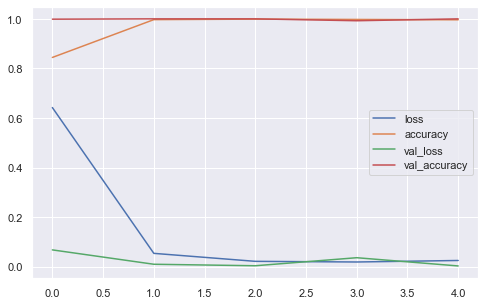

Epoch 1/5
625/625 [==============================] - 10s 15ms/step - loss: 0.5469 - accuracy: 0.8648 - val_loss: 0.0326 - val_accuracy: 0.9991
Epoch 2/5
625/625 [==============================] - 9s 15ms/step - loss: 0.0319 - accuracy: 0.9967 - val_loss: 0.0040 - val_accuracy: 0.9999
Epoch 3/5
625/625 [==============================] - 9s 15ms/step - loss: 0.0117 - accuracy: 0.9984 - val_loss: 8.9591e-04 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 9s 15ms/step - loss: 0.0058 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 0.9999
Epoch 5/5
625/625 [==============================] - 9s 15ms/step - loss: 0.0051 - accuracy: 0.9990 - val_loss: 0.0015 - val_accuracy: 0.9995


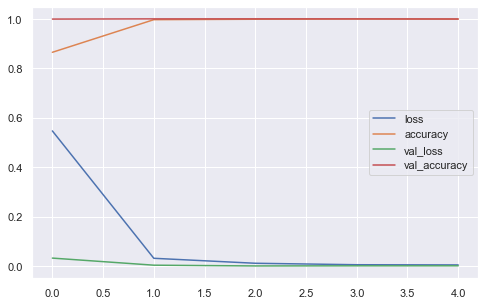

Epoch 1/5
625/625 [==============================] - 21s 31ms/step - loss: 0.6565 - accuracy: 0.8383 - val_loss: 0.0676 - val_accuracy: 0.9987
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0506 - accuracy: 0.9978 - val_loss: 0.0108 - val_accuracy: 0.9999
Epoch 3/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0217 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9999
Epoch 4/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0174 - accuracy: 0.9983 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 14s 22ms/step - loss: 0.0071 - accuracy: 0.9998 - val_loss: 8.7821e-04 - val_accuracy: 1.0000


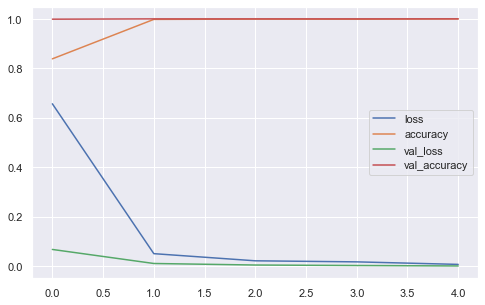

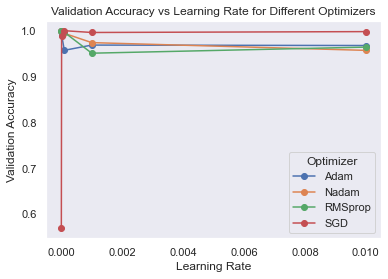

[['SGD', 0.01, 0.9979879260063171], ['Adam', 0.01, 0.9676727056503296], ['RMSprop', 0.01, 0.9641851186752319], ['Nadam', 0.01, 0.9570757746696472], ['SGD', 0.001, 0.9961100220680237], ['Adam', 0.001, 0.9686116576194763], ['RMSprop', 0.001, 0.950905442237854], ['Nadam', 0.001, 0.9739772081375122], ['SGD', 0.0001, 1.0], ['Adam', 0.0001, 0.9572099447250366], ['RMSprop', 0.0001, 0.9965124130249023], ['Nadam', 0.0001, 0.9942320585250854], ['SGD', 1e-05, 0.9881958365440369], ['Adam', 1e-05, 0.9904761910438538], ['RMSprop', 1e-05, 0.9974513649940491], ['Nadam', 1e-05, 0.9991951584815979], ['SGD', 1.0000000000000002e-06, 0.5686116814613342], ['Adam', 1.0000000000000002e-06, 1.0], ['RMSprop', 1.0000000000000002e-06, 0.9994634389877319], ['Nadam', 1.0000000000000002e-06, 1.0]]


In [87]:
# Define the number and size of hidden layers
hiddensizes = [1024,512] # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn = "relu"
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 5
learningrate = 0.01  # SGD default value

def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
    model.add(keras.layers.BatchNormalization())
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation=actfn))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(24, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

def train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, learning_rate):
    model = model_dense_factory(hiddensizes, actfn, optimizer, learning_rate)
    history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size=batch_size)
    return history

def plot_learning_rate_optimizer_results(res):
    df = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])
    pivot_df = df.pivot_table(values='Validation Accuracy', index='Learning Rate', columns='Optimizer')
    pivot_df.plot(marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs Learning Rate for Different Optimizers')
    plt.grid()
    plt.legend(title='Optimizer')
    plt.show()

learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]
optimizer_setup = [
    [keras.optimizers.SGD, 'SGD'],
    [keras.optimizers.Adam, 'Adam'],
    [keras.optimizers.RMSprop, 'RMSprop'],
    [keras.optimizers.Nadam, 'Nadam']
]

res = []

for lr in learning_rates:
    for optimizer, optimizer_name in optimizer_setup:
        history = train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, lr)
        val_acc = history.history['val_accuracy'][-1]
        res.append([optimizer_name, lr * learningrate, val_acc])
        pd.DataFrame(history.history).plot(figsize=(8, 5))
        plt.show()

plot_learning_rate_optimizer_results(res)
print(res)

In [88]:
# Create a DataFrame with the highest validation accuracy for each optimizer and learning rate
res_df_dnn = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])

# Sort the DataFrame by Validation Accuracy in descending order
res_df_dnn = res_df_dnn.sort_values(by='Validation Accuracy', ascending=False)

# Display the sorted DataFrame
print(res_df_dnn)

   Optimizer  Learning Rate  Validation Accuracy
19     Nadam       0.000001             1.000000
8        SGD       0.000100             1.000000
17      Adam       0.000001             1.000000
18   RMSprop       0.000001             0.999463
15     Nadam       0.000010             0.999195
0        SGD       0.010000             0.997988
14   RMSprop       0.000010             0.997451
10   RMSprop       0.000100             0.996512
4        SGD       0.001000             0.996110
11     Nadam       0.000100             0.994232
13      Adam       0.000010             0.990476
12       SGD       0.000010             0.988196
7      Nadam       0.001000             0.973977
5       Adam       0.001000             0.968612
1       Adam       0.010000             0.967673
2    RMSprop       0.010000             0.964185
9       Adam       0.000100             0.957210
3      Nadam       0.010000             0.957076
6    RMSprop       0.001000             0.950905
16       SGD       0

The highest validation accuracy is **Nadam with 0.001.**

###  3.1a **Replicate the best model with SGD**
Replicate the model with **SGD** since it has similar validation accuracy with Nadam.

In [104]:
# Define the number and size of hidden layers
hiddensizes = [1024,512] # number of kernels in each convlayer
# hiddensizes = [16, 32, 16]
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 20

def model_dense_factory(hiddensizes, actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28, 1]))
    model.add(keras.layers.BatchNormalization())
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation=actfn))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(24, activation="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])
    return model

In [105]:
def do_factory(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size, further_callbacks=[]):
    model = model_dense_factory(hiddensizes, actfn, optimizer, learningrate)
    history = model.fit(X_train, y_train, epochs=n_epochs,
                        validation_data=(X_val, y_val))
    max_val_acc = np.max(history.history['val_accuracy'])
    return (max_val_acc, history, model)

In [106]:
valacc, history, dnn_model = do_factory(hiddensizes, actfn, optimizer, learningrate, n_epochs, batch_size)
dnn_model.summary()

Epoch 1/20
625/625 [==============================] - 7s 10ms/step - loss: 0.5917 - accuracy: 0.8583 - val_loss: 0.0775 - val_accuracy: 0.9984
Epoch 2/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0697 - accuracy: 0.9964 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 3/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0318 - accuracy: 0.9992 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 4/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0204 - accuracy: 0.9996 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0150 - accuracy: 0.9998 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 6/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0117 - accuracy: 0.9999 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 7/20
625/625 [==============================] - 6s 10ms/step - loss: 0.0099 - accuracy: 0.9998 - val_loss: 0.0023 - val_accuracy: 1.0000

In [107]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

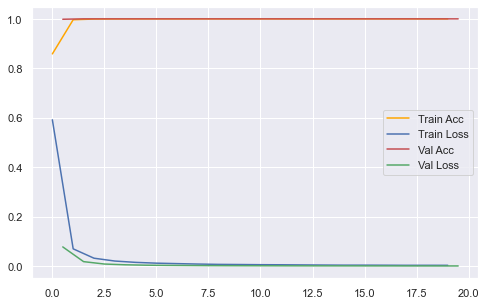

In [108]:
plot_history(history)

In [109]:
test_loss, test_accuracy = dnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Test loss: 0.6057904958724976, Test accuracy: 0.8258505463600159


**The DNN model has 82.58% accuracy has slightly higher than baseline model.**

###  3.2 **Leveraging with learning rates and optimizers with Convolutional Neural Network (CNN)**

In the **CNN model**, the model have been leveraging with:
1. Different learning rates and optimizers. 
2. The depth of the model has been added in order to see if it will change the model performance:
- Increasing the model depth can make the model learn simple features like edges and textures, 
    while deeper layers learn more complex structures like shapes and object parts by adding another:
    - **block of convolutional** and 
    - **Max pooling layers** and 
    - **another dense layer** 

3. Batch Normalization has the effect of changing the distribution of the output of the layer, specifically by standardizing the outputs. This has the effect of stabilizing and accelerating the learning process.

4. Convolutional  Neural Network model architecture is utilizing with multiple hidden layers. The number of neurons in hidden layers can have a significant impact on the neural network's performance, in this case is tried with **[64,32,64]**

Epoch 1/5
625/625 [==============================] - 64s 102ms/step - loss: 0.3323 - accuracy: 0.9103 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 2/5
625/625 [==============================] - 57s 91ms/step - loss: 0.0050 - accuracy: 0.9999 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 54s 86ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 51s 82ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 4.8251e-04 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 48s 77ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 3.2290e-04 - val_accuracy: 1.0000


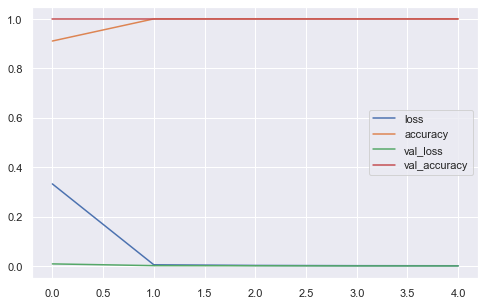

Epoch 1/5
625/625 [==============================] - 53s 84ms/step - loss: 4.8475 - accuracy: 0.0439 - val_loss: 3.3273 - val_accuracy: 0.0433
Epoch 2/5
625/625 [==============================] - 50s 80ms/step - loss: 3.1959 - accuracy: 0.0422 - val_loss: 7.7518 - val_accuracy: 0.0421
Epoch 3/5
625/625 [==============================] - 50s 80ms/step - loss: 3.1968 - accuracy: 0.0419 - val_loss: 26.4320 - val_accuracy: 0.0463
Epoch 4/5
625/625 [==============================] - 51s 82ms/step - loss: 3.1945 - accuracy: 0.0433 - val_loss: 27.9701 - val_accuracy: 0.0448
Epoch 5/5
625/625 [==============================] - 68s 109ms/step - loss: 3.1953 - accuracy: 0.0424 - val_loss: 51.0966 - val_accuracy: 0.0374


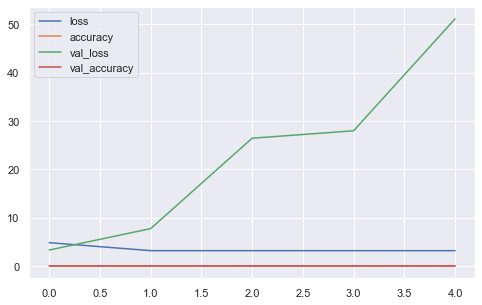

Epoch 1/5
625/625 [==============================] - 61s 96ms/step - loss: 9.0311 - accuracy: 0.0411 - val_loss: 3.2006 - val_accuracy: 0.0463
Epoch 2/5
625/625 [==============================] - 60s 96ms/step - loss: 3.1967 - accuracy: 0.0436 - val_loss: 3.2238 - val_accuracy: 0.0423
Epoch 3/5
625/625 [==============================] - 60s 96ms/step - loss: 3.1967 - accuracy: 0.0440 - val_loss: 7.5517 - val_accuracy: 0.0423
Epoch 4/5
625/625 [==============================] - 61s 97ms/step - loss: 3.1971 - accuracy: 0.0424 - val_loss: 9.3305 - val_accuracy: 0.0423
Epoch 5/5
625/625 [==============================] - 61s 97ms/step - loss: 3.1975 - accuracy: 0.0438 - val_loss: 10.4402 - val_accuracy: 0.0461


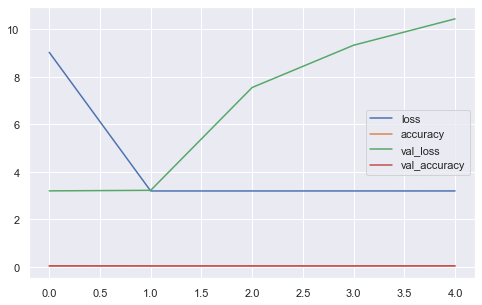

Epoch 1/5
625/625 [==============================] - 62s 97ms/step - loss: 4.0539 - accuracy: 0.0457 - val_loss: 3.1968 - val_accuracy: 0.0445
Epoch 2/5
625/625 [==============================] - 60s 96ms/step - loss: 3.1952 - accuracy: 0.0421 - val_loss: 3.8170 - val_accuracy: 0.0382
Epoch 3/5
625/625 [==============================] - 60s 96ms/step - loss: 3.1953 - accuracy: 0.0431 - val_loss: 4.6500 - val_accuracy: 0.0424
Epoch 4/5
625/625 [==============================] - 60s 96ms/step - loss: 3.1951 - accuracy: 0.0426 - val_loss: 4.5034 - val_accuracy: 0.0464
Epoch 5/5
625/625 [==============================] - 61s 97ms/step - loss: 3.1967 - accuracy: 0.0424 - val_loss: 5.1828 - val_accuracy: 0.0448


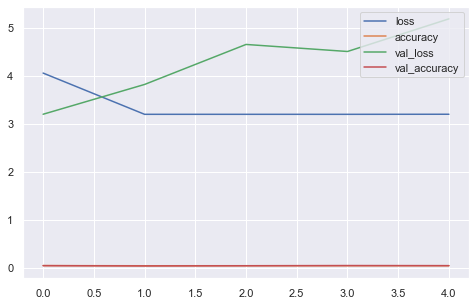

Epoch 1/5
625/625 [==============================] - 61s 97ms/step - loss: 0.5164 - accuracy: 0.8801 - val_loss: 0.1829 - val_accuracy: 0.9897
Epoch 2/5
625/625 [==============================] - 56s 90ms/step - loss: 0.0364 - accuracy: 0.9996 - val_loss: 0.0246 - val_accuracy: 0.9999
Epoch 3/5
625/625 [==============================] - 58s 93ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 54s 86ms/step - loss: 0.0108 - accuracy: 0.9999 - val_loss: 0.0057 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 54s 87ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000


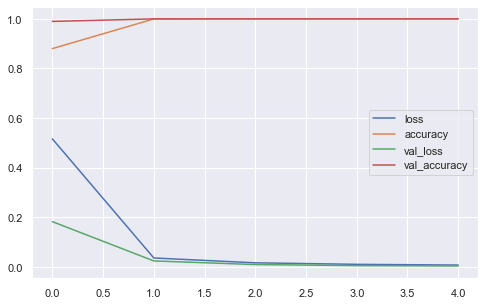

Epoch 1/5
625/625 [==============================] - 56s 89ms/step - loss: 1.1157 - accuracy: 0.7332 - val_loss: 0.9325 - val_accuracy: 0.7946
Epoch 2/5
625/625 [==============================] - 60s 96ms/step - loss: 0.1931 - accuracy: 0.9409 - val_loss: 0.3053 - val_accuracy: 0.9315
Epoch 3/5
625/625 [==============================] - 57s 91ms/step - loss: 0.1514 - accuracy: 0.9612 - val_loss: 62.9454 - val_accuracy: 0.0955
Epoch 4/5
625/625 [==============================] - 56s 90ms/step - loss: 0.2027 - accuracy: 0.9582 - val_loss: 0.9456 - val_accuracy: 0.9148
Epoch 5/5
625/625 [==============================] - 55s 89ms/step - loss: 0.1085 - accuracy: 0.9807 - val_loss: 0.4010 - val_accuracy: 0.9414


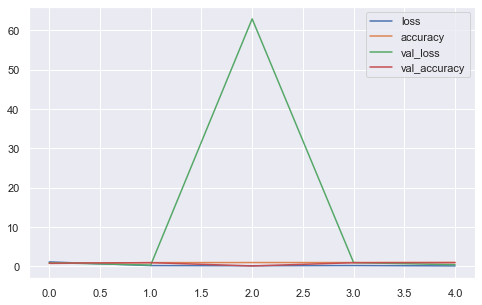

Epoch 1/5
625/625 [==============================] - 58s 92ms/step - loss: 1.1865 - accuracy: 0.7707 - val_loss: 0.4117 - val_accuracy: 0.9057
Epoch 2/5
625/625 [==============================] - 54s 86ms/step - loss: 0.1778 - accuracy: 0.9626 - val_loss: 2.9980 - val_accuracy: 0.7285
Epoch 3/5
625/625 [==============================] - 53s 85ms/step - loss: 0.1219 - accuracy: 0.9787 - val_loss: 1.8229 - val_accuracy: 0.8818
Epoch 4/5
625/625 [==============================] - 56s 89ms/step - loss: 0.0975 - accuracy: 0.9846 - val_loss: 2.3891 - val_accuracy: 0.8490
Epoch 5/5
625/625 [==============================] - 62s 100ms/step - loss: 0.0806 - accuracy: 0.9891 - val_loss: 0.0268 - val_accuracy: 0.9958


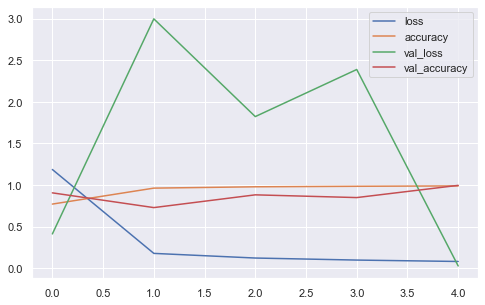

Epoch 1/5
625/625 [==============================] - 84s 130ms/step - loss: 0.5215 - accuracy: 0.8709 - val_loss: 5.1983 - val_accuracy: 0.4698
Epoch 2/5
625/625 [==============================] - 67s 107ms/step - loss: 0.1650 - accuracy: 0.9584 - val_loss: 97.3684 - val_accuracy: 0.1242
Epoch 3/5
625/625 [==============================] - 57s 91ms/step - loss: 0.1408 - accuracy: 0.9693 - val_loss: 3.8391 - val_accuracy: 0.7124
Epoch 4/5
625/625 [==============================] - 54s 86ms/step - loss: 0.1181 - accuracy: 0.9768 - val_loss: 1.2723 - val_accuracy: 0.9218
Epoch 5/5
625/625 [==============================] - 57s 91ms/step - loss: 0.2325 - accuracy: 0.9706 - val_loss: 2.3091 - val_accuracy: 0.8606


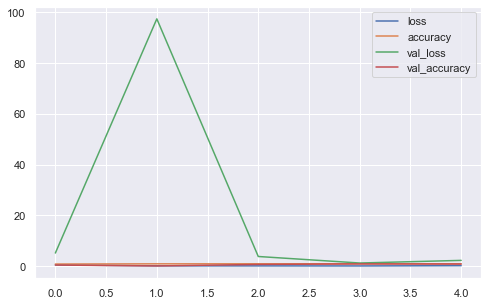

Epoch 1/5
625/625 [==============================] - 57s 90ms/step - loss: 1.8114 - accuracy: 0.5361 - val_loss: 1.4589 - val_accuracy: 0.6638
Epoch 2/5
625/625 [==============================] - 56s 90ms/step - loss: 0.6880 - accuracy: 0.8794 - val_loss: 0.6326 - val_accuracy: 0.8762
Epoch 3/5
625/625 [==============================] - 57s 91ms/step - loss: 0.3728 - accuracy: 0.9586 - val_loss: 0.2932 - val_accuracy: 0.9759
Epoch 4/5
625/625 [==============================] - 54s 87ms/step - loss: 0.2398 - accuracy: 0.9843 - val_loss: 0.1879 - val_accuracy: 0.9899
Epoch 5/5
625/625 [==============================] - 51s 82ms/step - loss: 0.1676 - accuracy: 0.9935 - val_loss: 0.1304 - val_accuracy: 0.9960


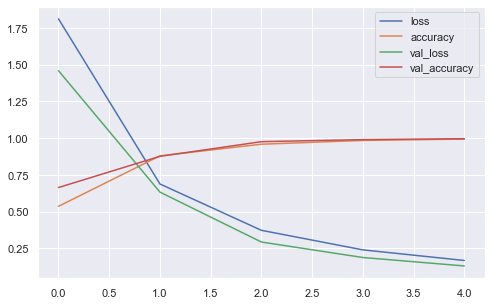

Epoch 1/5
625/625 [==============================] - 69s 107ms/step - loss: 0.1755 - accuracy: 0.9513 - val_loss: 0.0342 - val_accuracy: 0.9917
Epoch 2/5
625/625 [==============================] - 71s 113ms/step - loss: 7.6019e-04 - accuracy: 0.9999 - val_loss: 6.4985e-05 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 70s 112ms/step - loss: 2.7794e-04 - accuracy: 1.0000 - val_loss: 2.8951e-05 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 72s 115ms/step - loss: 1.0181e-04 - accuracy: 1.0000 - val_loss: 1.4349e-05 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 67s 106ms/step - loss: 6.4368e-05 - accuracy: 1.0000 - val_loss: 9.3771e-06 - val_accuracy: 1.0000


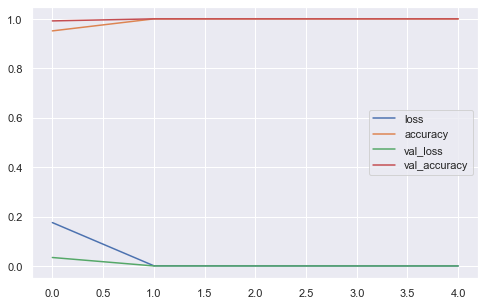

Epoch 1/5
625/625 [==============================] - 63s 100ms/step - loss: 0.2005 - accuracy: 0.9439 - val_loss: 0.1004 - val_accuracy: 0.9653
Epoch 2/5
625/625 [==============================] - 62s 99ms/step - loss: 0.0149 - accuracy: 0.9956 - val_loss: 0.0351 - val_accuracy: 0.9871
Epoch 3/5
625/625 [==============================] - 65s 104ms/step - loss: 0.0047 - accuracy: 0.9987 - val_loss: 1.8998e-04 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 68s 109ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0199 - val_accuracy: 0.9926
Epoch 5/5
625/625 [==============================] - 62s 99ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0025 - val_accuracy: 0.9992


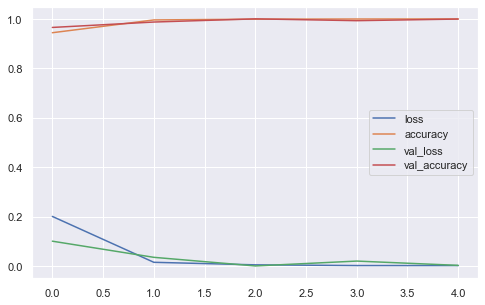

Epoch 1/5
625/625 [==============================] - 75s 117ms/step - loss: 0.1682 - accuracy: 0.9518 - val_loss: 0.6453 - val_accuracy: 0.7989
Epoch 2/5
625/625 [==============================] - 69s 110ms/step - loss: 0.0394 - accuracy: 0.9876 - val_loss: 0.0713 - val_accuracy: 0.9799
Epoch 3/5
625/625 [==============================] - 65s 104ms/step - loss: 0.0552 - accuracy: 0.9838 - val_loss: 0.3626 - val_accuracy: 0.9202
Epoch 4/5
625/625 [==============================] - 59s 95ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0905 - val_accuracy: 0.9726
Epoch 5/5
625/625 [==============================] - 63s 101ms/step - loss: 0.0176 - accuracy: 0.9954 - val_loss: 0.0010 - val_accuracy: 0.9997


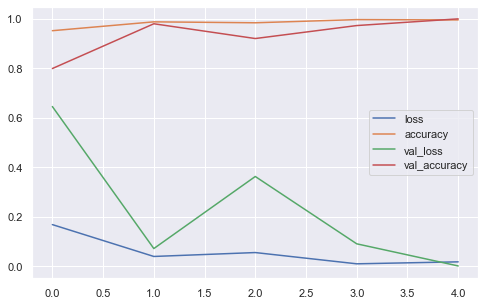

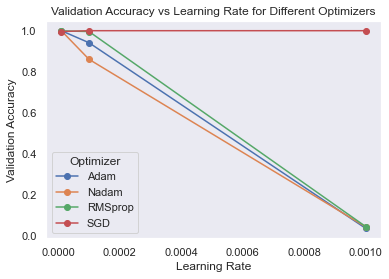

[['SGD', 0.001, 1.0], ['Adam', 0.001, 0.03742454573512077], ['RMSprop', 0.001, 0.04614352807402611], ['Nadam', 0.001, 0.04480214789509773], ['SGD', 0.0001, 1.0], ['Adam', 0.0001, 0.9413816332817078], ['RMSprop', 0.0001, 0.9958417415618896], ['Nadam', 0.0001, 0.860630452632904], ['SGD', 1e-05, 0.9959758520126343], ['Adam', 1e-05, 1.0], ['RMSprop', 1e-05, 0.9991951584815979], ['Nadam', 1e-05, 0.999731719493866]]


In [111]:
# Define the number and size of hidden layers
hiddensizes = [64,32,64] # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 5

def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1])) 
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(200, activation = "relu"))
    model.add(keras.layers.Dense(24, activation = "softmax"))  # always have 24 classes
    model.compile(loss="categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

def train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, learning_rate):
    model = model_cnn_factory(hiddensizes, actfn, optimizer, learning_rate)
    history = model.fit(X_train, y_train, epochs=n_epochs, validation_data=(X_val, y_val), batch_size=batch_size)
    return history

def plot_learning_rate_optimizer_results(res):
    df = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])
    pivot_df = df.pivot_table(values='Validation Accuracy', index='Learning Rate', columns='Optimizer')
    pivot_df.plot(marker='o')
    plt.xlabel('Learning Rate')
    plt.ylabel('Validation Accuracy')
    plt.title('Validation Accuracy vs Learning Rate for Different Optimizers')
    plt.grid()
    plt.legend(title='Optimizer')
    plt.show()
    
learning_rates = [0.1, 0.01, 0.001]
optimizer_setup = [
    [keras.optimizers.SGD, 'SGD'],
    [keras.optimizers.Adam, 'Adam'],
    [keras.optimizers.RMSprop, 'RMSprop'],
    [keras.optimizers.Nadam, 'Nadam']
]

res = []

for lr in learning_rates:
    for optimizer, optimizer_name in optimizer_setup:
        history = train_model_with_learning_rate_optimizer(X_train, y_train, X_val, y_val, optimizer, lr)
        val_acc = history.history['val_accuracy'][-1]
        res.append([optimizer_name, lr * learningrate, val_acc])
        pd.DataFrame(history.history).plot(figsize=(8, 5))
        plt.show()

plot_learning_rate_optimizer_results(res)
print(res)

In [112]:
# Overall model performances
res_df = pd.DataFrame(res, columns=['Optimizer', 'Learning Rate', 'Validation Accuracy'])
res_df

,Optimizer,Learning Rate,Validation Accuracy
0,SGD,0.00100,1.000000
1,Adam,0.00100,0.037425
2,RMSprop,0.00100,0.046144
3,Nadam,0.00100,0.044802
4,SGD,0.00010,1.000000
5,Adam,0.00010,0.941382
6,RMSprop,0.00010,0.995842
7,Nadam,0.00010,0.860630
8,SGD,0.00001,0.995976
9,Adam,0.00001,1.000000


The highest validation accuracy is **SGD with 0.01**

###  3.2a **Replicate the best model**

In [115]:
# Define the number and size of hidden layers
hiddensizes = [64,32,64] # number of kernels in each convlayer
# Define the activation function to be used by hidden layers
actfn = "relu"
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 5

In [116]:
# Build a CNN model
def model_cnn_factory(hiddensizes, actfn, optimizer, learningrate=0):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
    model.add(keras.layers.Conv2D(filters=hiddensizes[0], kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1])) 
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=2)) # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(200, activation = "relu"))
    model.add(keras.layers.Dense(24, activation = "softmax"))  # always have 24 classes
    model.compile(loss="categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate,momentum=0.9), metrics=["accuracy"])   
    return model

In [117]:
cnn_model = model_cnn_factory(hiddensizes, actfn, optimizer, learningrate)
history = cnn_model.fit(X_train, y_train, epochs=n_epochs,validation_data=(X_val, y_val))
max_val_acc = np.max(history.history['val_accuracy'])

Epoch 1/5
625/625 [==============================] - 63s 101ms/step - loss: 0.2729 - accuracy: 0.9203 - val_loss: 0.0041 - val_accuracy: 0.9999
Epoch 2/5
625/625 [==============================] - 56s 90ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/5
625/625 [==============================] - 56s 90ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 8.3349e-04 - val_accuracy: 1.0000
Epoch 4/5
625/625 [==============================] - 56s 90ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 3.4824e-04 - val_accuracy: 1.0000
Epoch 5/5
625/625 [==============================] - 58s 92ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 5.6829e-04 - val_accuracy: 1.0000


In [118]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 24)                2424      
                                                                 
Total params: 543,644
Trainable params: 543,644
Non-trainable params: 0
__________________________________________________

In [119]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.show() 

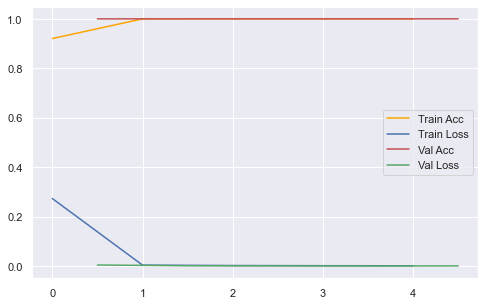

In [120]:
plot_history(history)

In [121]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Test loss: 0.2127685546875, Test accuracy: 0.9454824328422546


**The CNN model accuracy of 94.55%.**

# 4. Comparison of models, selection of the best two and reporting of final results

###  4.1 **DNN with SGD optimizer with learning rate of 0.01**

225/225 [==============================] - 1s 4ms/step
Overall Accuracy: 82.59%
Accuracy for Each Individual Letter with DNN model:
Accuracy for A: 100.00%
Accuracy for B: 89.35%
Accuracy for C: 100.00%
Accuracy for D: 99.18%
Accuracy for E: 91.97%
Accuracy for F: 90.69%
Accuracy for G: 93.10%
Accuracy for H: 90.60%
Accuracy for I: 86.11%
Accuracy for K: 70.09%
Accuracy for L: 100.00%
Accuracy for M: 73.60%
Accuracy for N: 69.76%
Accuracy for O: 84.96%
Accuracy for P: 100.00%
Accuracy for Q: 87.20%
Accuracy for R: 56.94%
Accuracy for S: 78.46%
Accuracy for T: 64.92%
Accuracy for U: 50.38%
Accuracy for V: 50.87%
Accuracy for W: 70.39%
Accuracy for X: 89.14%
Accuracy for Y: 72.89%
Letter with Lowest Accuracy: U (Accuracy: 50.38%)
Most Common Error (One Letter Incorrectly Labeled as Another): V labeled as W


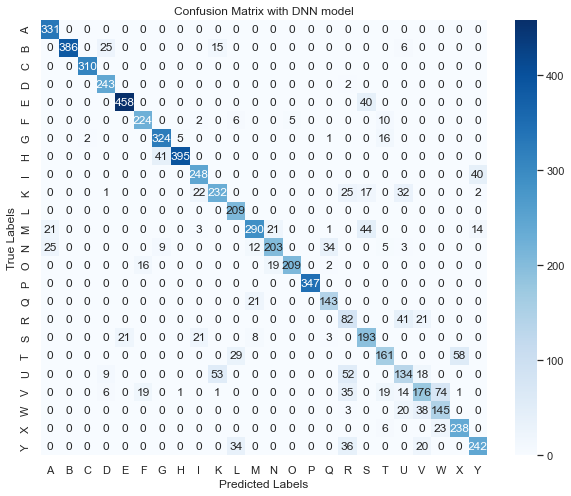

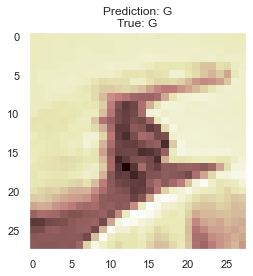

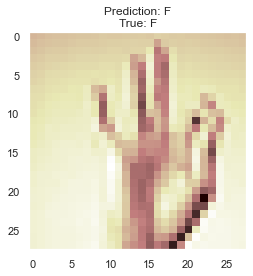

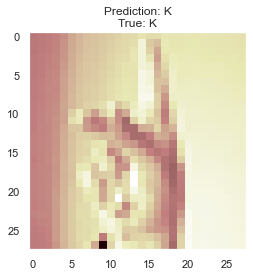

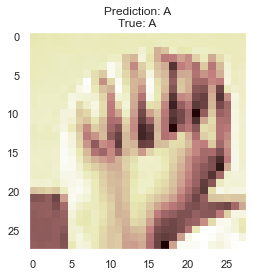

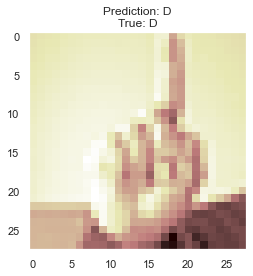

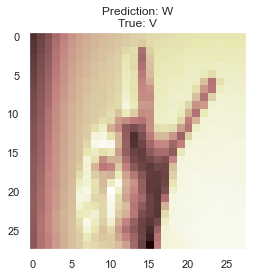

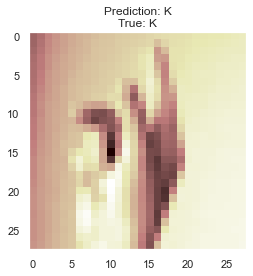

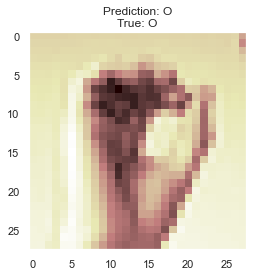

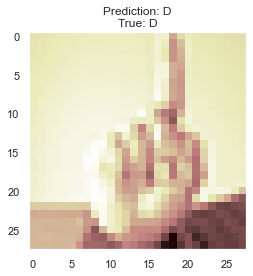

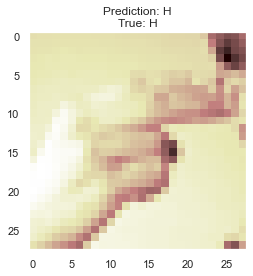

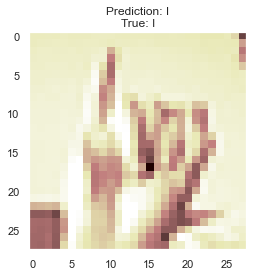

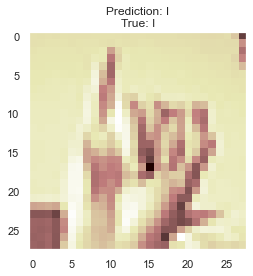

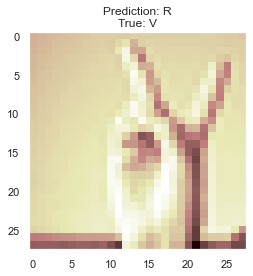

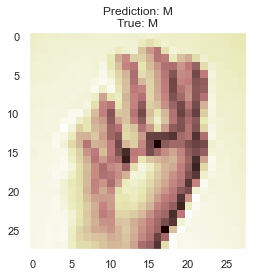

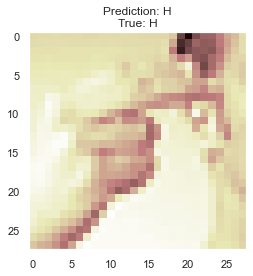

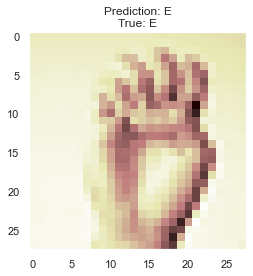

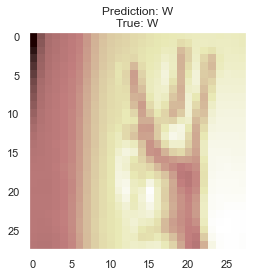

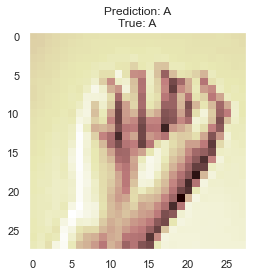

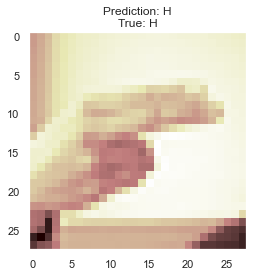

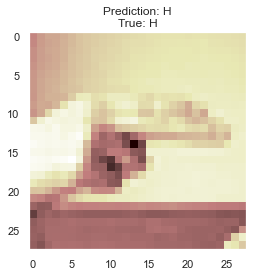

In [124]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test dataset
y_pred = dnn_model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Convert true labels to class labels
y_true_labels = np.argmax(y_test, axis=-1)

# Calculate overall accuracy
overall_accuracy = np.mean(y_pred_labels == y_true_labels)

# Calculate accuracy for each individual letter
individual_letter_accuracy = {}
for label in range(len(class_names)):
    mask = y_true_labels == label
    correct_predictions = np.sum(y_pred_labels[mask] == label)
    total_samples = np.sum(mask)
    accuracy = correct_predictions / total_samples
    individual_letter_accuracy[class_names[label]] = accuracy

# Find the letter with the lowest individual accuracy
lowest_accuracy_letter = min(individual_letter_accuracy, key=individual_letter_accuracy.get)
lowest_accuracy = individual_letter_accuracy[lowest_accuracy_letter]

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Find the most common error (one letter being incorrectly labeled as another)
errors_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_common_error = np.unravel_index(np.argmax(errors_matrix), errors_matrix.shape)

# Print the results
print("Overall Accuracy: {:.2f}%".format(overall_accuracy * 100))
print("Accuracy for Each Individual Letter with DNN model:")
for letter, accuracy in individual_letter_accuracy.items():
    print("Accuracy for {}: {:.2f}%".format(letter, accuracy * 100))
print("Letter with Lowest Accuracy: {} (Accuracy: {:.2f}%)".format(lowest_accuracy_letter, lowest_accuracy * 100))
print("Most Common Error (One Letter Incorrectly Labeled as Another): {} labeled as {}".format(class_names[most_common_error[0]], class_names[most_common_error[1]]))

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with DNN model")
plt.show()

# Display images and predictions for a subset of test samples
list_1 = range(20)  # Display the first 40 test samples
for i in list_1:
    plt.imshow(X_test[i].reshape((28, 28)), cmap="pink")
    plt.grid(False)
    plt.title("Prediction: {}\nTrue: {}".format(class_names[y_pred_labels[i]], class_names[y_true_labels[i]]))
    plt.show()

In [125]:
from sklearn.metrics import confusion_matrix, f1_score

# Calculate F1 score for each individual letter
individual_letter_f1_score = {}
for label in range(len(class_names)):
    mask = y_true_labels == label
    predicted_as_label = y_pred_labels[mask] == label
    true_as_label = y_true_labels[mask] == label
    f1 = f1_score(true_as_label, predicted_as_label)
    individual_letter_f1_score[class_names[label]] = f1

# Calculate overall F1 score
overall_f1_score = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print F1 score for each individual letter
print("F1 Score for Each Individual Letter with DNN model:")
for letter, f1 in individual_letter_f1_score.items():
    print("F1 Score for {}: {:.4f}".format(letter, f1))

# Print overall F1 score
print("Overall F1 Score: {:.4f}".format(overall_f1_score))

F1 Score for Each Individual Letter with DNN model:
F1 Score for A: 1.0000
F1 Score for B: 0.9438
F1 Score for C: 1.0000
F1 Score for D: 0.9959
F1 Score for E: 0.9582
F1 Score for F: 0.9512
F1 Score for G: 0.9643
F1 Score for H: 0.9507
F1 Score for I: 0.9254
F1 Score for K: 0.8242
F1 Score for L: 1.0000
F1 Score for M: 0.8480
F1 Score for N: 0.8219
F1 Score for O: 0.9187
F1 Score for P: 1.0000
F1 Score for Q: 0.9316
F1 Score for R: 0.7257
F1 Score for S: 0.8793
F1 Score for T: 0.7873
F1 Score for U: 0.6700
F1 Score for V: 0.6743
F1 Score for W: 0.8262
F1 Score for X: 0.9426
F1 Score for Y: 0.8432
Overall F1 Score: 0.8266


**Overall accuracy with DNN model is 82.66%**

###  4.2 **CNN with SGD optimizer with learning rate of 0.01**

225/225 [==============================] - 5s 24ms/step
Overall Accuracy: 94.55%
Accuracy for Each Individual Letter with CNN model:
Accuracy for A: 100.00%
Accuracy for B: 100.00%
Accuracy for C: 100.00%
Accuracy for D: 100.00%
Accuracy for E: 100.00%
Accuracy for F: 100.00%
Accuracy for G: 94.25%
Accuracy for H: 90.60%
Accuracy for I: 98.96%
Accuracy for K: 91.24%
Accuracy for L: 100.00%
Accuracy for M: 96.45%
Accuracy for N: 85.22%
Accuracy for O: 99.59%
Accuracy for P: 100.00%
Accuracy for Q: 100.00%
Accuracy for R: 100.00%
Accuracy for S: 91.46%
Accuracy for T: 71.77%
Accuracy for U: 81.58%
Accuracy for V: 93.93%
Accuracy for W: 99.51%
Accuracy for X: 85.39%
Accuracy for Y: 88.25%
Letter with Lowest Accuracy: T (Accuracy: 71.77%)
Most Common Error (One Letter Incorrectly Labeled as Another): T labeled as X


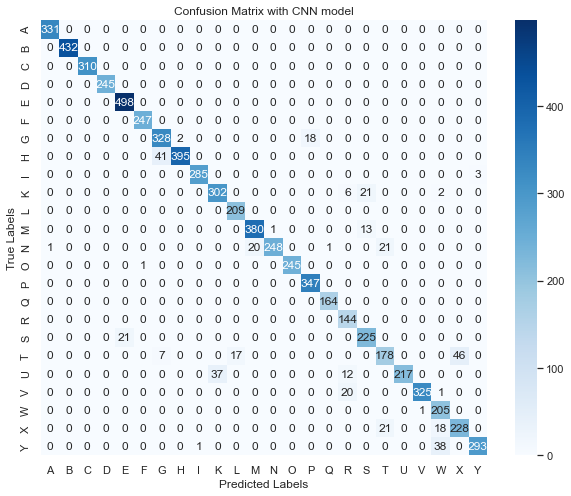

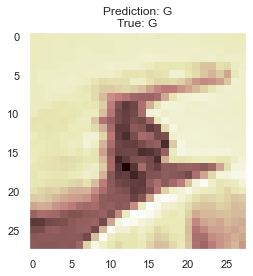

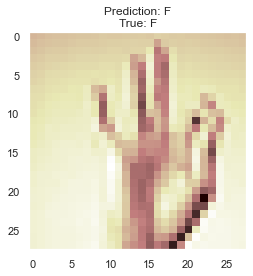

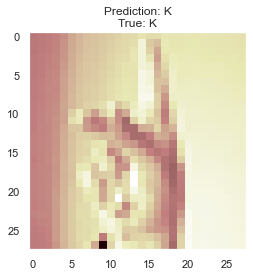

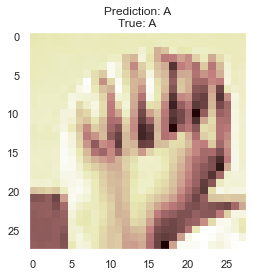

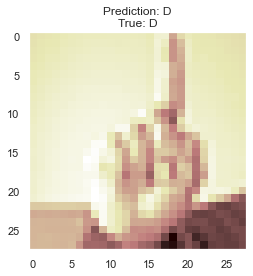

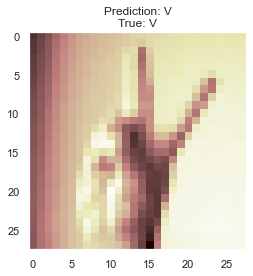

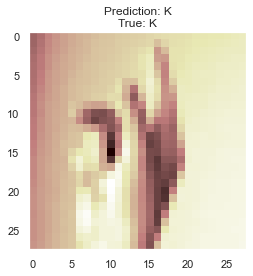

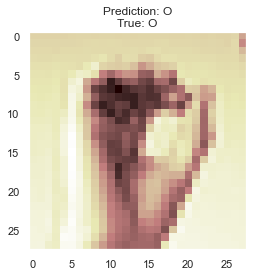

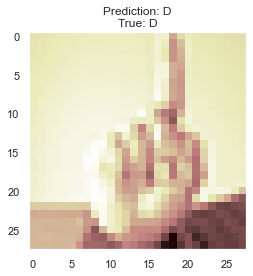

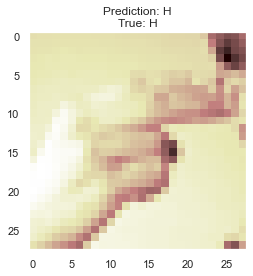

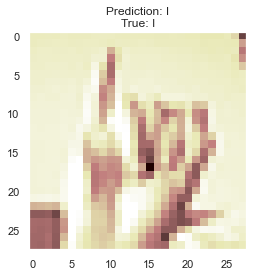

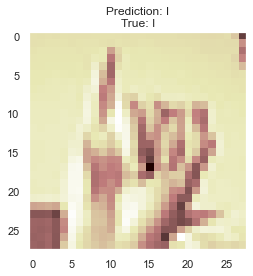

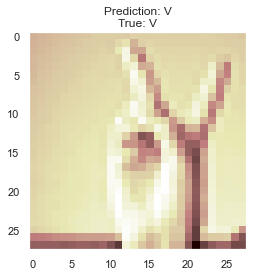

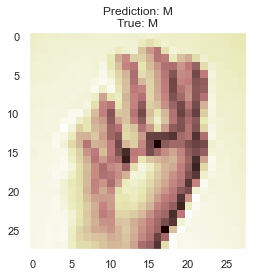

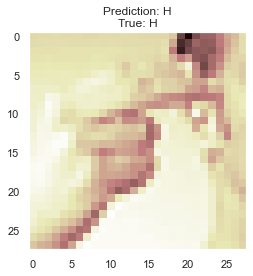

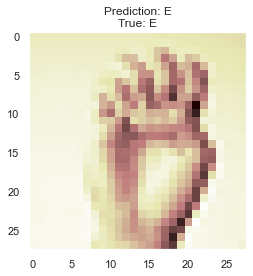

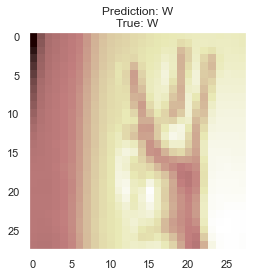

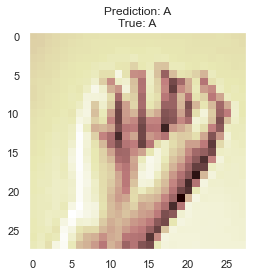

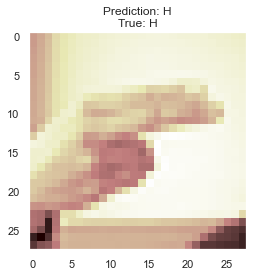

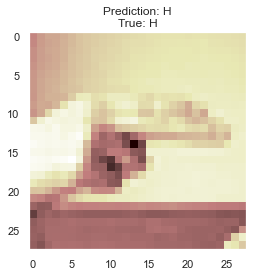

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the test dataset
y_pred = cnn_model.predict(X_test)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=-1)

# Convert true labels to class labels
y_true_labels = np.argmax(y_test, axis=-1)

# Calculate overall accuracy
overall_accuracy = np.mean(y_pred_labels == y_true_labels)

# Calculate accuracy for each individual letter
individual_letter_accuracy = {}
for label in range(len(class_names)):
    mask = y_true_labels == label
    correct_predictions = np.sum(y_pred_labels[mask] == label)
    total_samples = np.sum(mask)
    accuracy = correct_predictions / total_samples
    individual_letter_accuracy[class_names[label]] = accuracy

# Find the letter with the lowest individual accuracy
lowest_accuracy_letter = min(individual_letter_accuracy, key=individual_letter_accuracy.get)
lowest_accuracy = individual_letter_accuracy[lowest_accuracy_letter]

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Find the most common error (one letter being incorrectly labeled as another)
errors_matrix = conf_matrix - np.diag(np.diag(conf_matrix))
most_common_error = np.unravel_index(np.argmax(errors_matrix), errors_matrix.shape)

# Print the results
print("Overall Accuracy: {:.2f}%".format(overall_accuracy * 100))
print("Accuracy for Each Individual Letter with CNN model:")
for letter, accuracy in individual_letter_accuracy.items():
    print("Accuracy for {}: {:.2f}%".format(letter, accuracy * 100))
print("Letter with Lowest Accuracy: {} (Accuracy: {:.2f}%)".format(lowest_accuracy_letter, lowest_accuracy * 100))
print("Most Common Error (One Letter Incorrectly Labeled as Another): {} labeled as {}".format(class_names[most_common_error[0]], class_names[most_common_error[1]]))

# Display confusion matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix with CNN model")
plt.show()

# Display images and predictions for a subset of test samples
list_1 = range(20)  # Display the first 40 test samples
for i in list_1:
    plt.imshow(X_test[i].reshape((28, 28)), cmap="pink")
    plt.grid(False)
    plt.title("Prediction: {}\nTrue: {}".format(class_names[y_pred_labels[i]], class_names[y_true_labels[i]]))
    plt.show()

In [130]:
from sklearn.metrics import confusion_matrix, f1_score

# Calculate F1 score for each individual letter
individual_letter_f1_score = {}
for label in range(len(class_names)):
    mask = y_true_labels == label
    predicted_as_label = y_pred_labels[mask] == label
    true_as_label = y_true_labels[mask] == label
    f1 = f1_score(true_as_label, predicted_as_label)
    individual_letter_f1_score[class_names[label]] = f1

# Calculate overall F1 score
overall_f1_score = f1_score(y_true_labels, y_pred_labels, average='weighted')

# Print F1 score for each individual letter
print("F1 Score for Each Individual Letter with CNN model:")
for letter, f1 in individual_letter_f1_score.items():
    print("F1 Score for {}: {:.4f}".format(letter, f1))

# Print overall F1 score
print("Overall F1 Score: {:.4f}".format(overall_f1_score))

F1 Score for Each Individual Letter with CNN model:
F1 Score for A: 1.0000
F1 Score for B: 1.0000
F1 Score for C: 1.0000
F1 Score for D: 1.0000
F1 Score for E: 1.0000
F1 Score for F: 1.0000
F1 Score for G: 0.9704
F1 Score for H: 0.9507
F1 Score for I: 0.9948
F1 Score for K: 0.9542
F1 Score for L: 1.0000
F1 Score for M: 0.9819
F1 Score for N: 0.9202
F1 Score for O: 0.9980
F1 Score for P: 1.0000
F1 Score for Q: 1.0000
F1 Score for R: 1.0000
F1 Score for S: 0.9554
F1 Score for T: 0.8357
F1 Score for U: 0.8986
F1 Score for V: 0.9687
F1 Score for W: 0.9976
F1 Score for X: 0.9212
F1 Score for Y: 0.9376
Overall F1 Score: 0.9454


**Overall accuracy with CNN model is 94.55%**

## Conclusion

With DNN model:
Letter with Lowest Accuracy: **U (Accuracy: 50.38%)** and 
Most Common Error (One Letter Incorrectly Labeled as Another): **V** labeled as **W**

With CNN model:
Letter with Lowest Accuracy: **T (Accuracy: 71.77%)** and
Most Common Error (One Letter Incorrectly Labeled as Another): **T** labeled as **X**

Here, we can conclude that the **Convolutional Neural Network (CNN)** has given an outstanding performance in the classification of sign language symbol images. The average accuracy score of the model is **94.55%**.However, we could not meet the client requirement of achieving more than **96%** overall accuracy but it can further be improved by tuning the hyperparameters. Alas, more than **94%** accuracy is also an achievement.

## Recommendation

The CNN model has achieved a reasonable overall accuracy of **94.55%**.
However, the accuracy for individual letters varies. Some letters might have lower accuracy due to their visual similarity or other factors.
The accuracy of the lower letter could be improve by having various viewing angles under different backgrounds and takes into consideration various conditions such as lighting and distance.
To improve accuracy, you can consider further model development, hyperparameter tuning, and data augmentation.
It's possible to achieve higher accuracy, especially if you experiment with different architectures, regularization techniques, learning rate schedules, and possibly even explore transfer learning.
